In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()
from sklearn.preprocessing import LabelEncoder
import gc

# user

In [2]:
train_user = pd.read_csv(r'E:\Term2\数据挖掘\pre\rawdata\train\train_user.csv')
test_user = pd.read_csv(r'E:\Term2\数据挖掘\pre\rawdata\test\test_user.csv')

In [3]:
test_user.head()

,phone_no_m,city_name,county_name,idcard_cnt,arpu_202004
0,22d522340df77e2252c1a4d92b4bcb00d515e36f3ec6bf...,成都,金牛分公司,1,9.0
1,5220d4b8429bdba3971a7b46a088c6b8fa6710f4060759...,天府新区,天府直属部门,1,NaN
2,7d19dd2b50ced56f03d23bf928cf34dc570a48525571a8...,成都,锦江分公司,1,9.0
3,134a4a591185c9d3788021896dcfc235e9e0a6a1e3f8a4...,绵阳,江油分公司,1,138.7
4,2356dcd6759d50455ddaeed03c838843558e9182d5962f...,成都,青羊分公司,2,39.0


In [4]:
tr_u = set(list(train_user.phone_no_m.unique()))
te_u = set(list(test_user.phone_no_m.unique()))

tr_u & te_u

set()

Text(0.5, 1.0, 'Label')

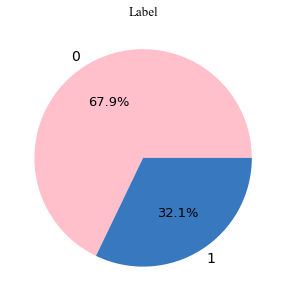

In [5]:
plt.figure(figsize=(5,5))
label_count=train_user.label.value_counts()
patches,l_text,p_text=plt.pie(label_count,labels=['0','1'],autopct='%1.1f%%',colors=['pink','#3778bf'])
for t in l_text:
    t.set_size(14)
for t in p_text:
    t.set_size(13)

plt.title('Label',family= 'Times New Roman',size=13)

In [7]:
train_user.shape, test_user.shape

((6106, 13), (2045, 5))

In [8]:
# 只取训练集中最后一个月的数据
train_user['arpu_202004'] = train_user['arpu_202003']
train_user.head()

,phone_no_m,city_name,county_name,idcard_cnt,arpu_201908,arpu_201909,arpu_201910,arpu_201911,arpu_201912,arpu_202001,arpu_202002,arpu_202003,label,arpu_202004
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a...,绵阳,江油分公司,1,46.06,45.00,45.0,45.00,45.00,45.0,45.0,45.0,0,45.0
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34d...,德阳,旌阳分公司,1,79.00,79.20,79.1,79.30,41.40,34.1,59.4,60.0,0,60.0
2,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c...,成都,金堂分公司,2,18.85,24.45,22.0,21.40,22.15,21.1,61.3,63.0,0,63.0
3,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f...,成都,高新分公司,2,19.20,29.65,130.4,173.12,19.00,19.0,19.0,23.2,0,23.2
4,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d...,德阳,旌阳分公司,1,50.00,50.00,50.0,50.00,50.00,50.0,50.0,50.0,0,50.0


In [9]:
train_user.drop(['arpu_201908', 'arpu_201909', 'arpu_201910', 'arpu_201911',
                 'arpu_201912', 'arpu_202001', 'arpu_202002', 'arpu_202003'], axis=1, inplace=True)

In [10]:
df_user = pd.concat([train_user, test_user])

In [11]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

plt.rcParams['axes.unicode_minus']=False

Text(0, 0.5, 'Count')

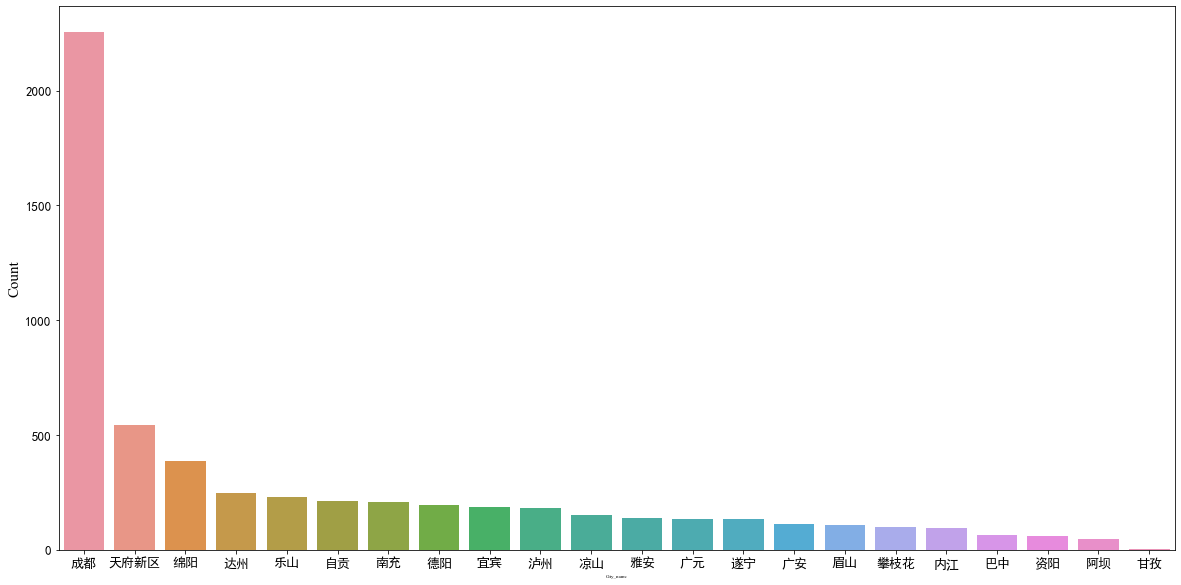

In [12]:
plt.figure(figsize=(20,10))
tem=train_user['city_name'].value_counts()
sns.countplot(train_user['city_name'],order=tem.index)
plt.tick_params(labelsize=13)
plt.xlabel('City_name',size=5,family= 'Times New Roman')
plt.ylabel('Count',size=15,family= 'Times New Roman')

In [ ]:

fig = plt.figure()
fig.set(alpha=0.2) # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别")
plt.ylabel(u"人数")
plt.show()


Text(0, 0.5, 'Count')

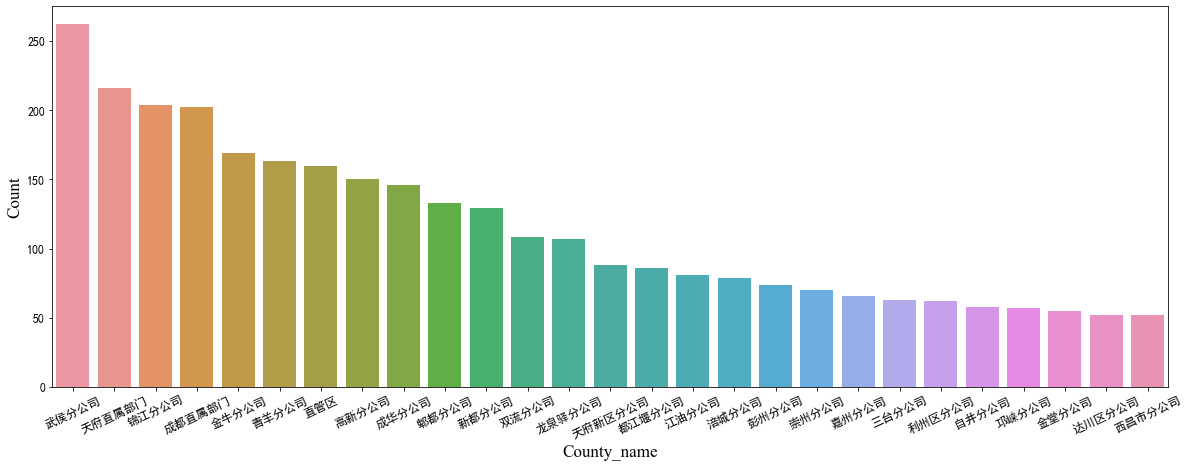

In [288]:
plt.figure(figsize=(20,7))
tem=train_user.county_name.value_counts()
tem=tem[tem>50]
sns.countplot(train_user[train_user.county_name.isin(tem.index)].county_name,order=tem.index)
plt.xticks(rotation=25)
plt.tick_params(labelsize=12)
plt.xlabel('County_name',size=17,family= 'Times New Roman')
plt.ylabel('Count',size=17,family= 'Times New Roman')

In [270]:
len(train_user['county_name'].unique())

182

Text(0, 0.5, 'Count')

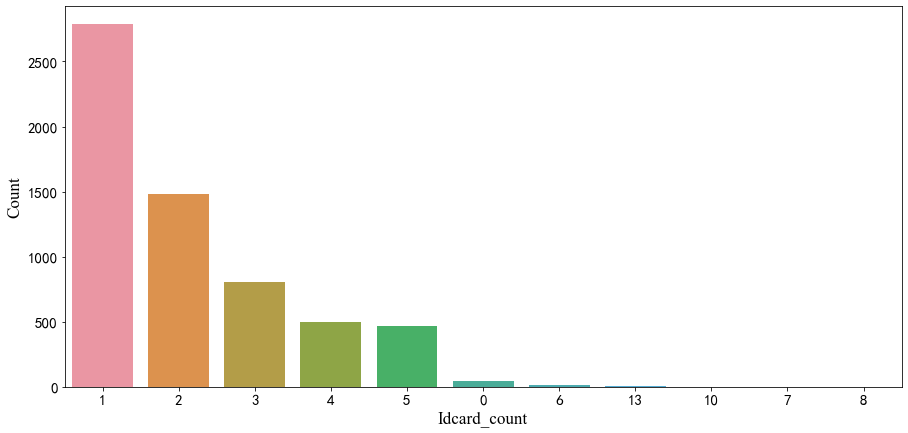

In [284]:
plt.figure(figsize=(15,7))
tem=train_user['idcard_cnt'].value_counts()
sns.countplot(train_user['idcard_cnt'],order=tem.index)
plt.tick_params(labelsize=15)
plt.xlabel('Idcard_count',size=17,family= 'Times New Roman')
plt.ylabel('Count',size=17,family= 'Times New Roman')

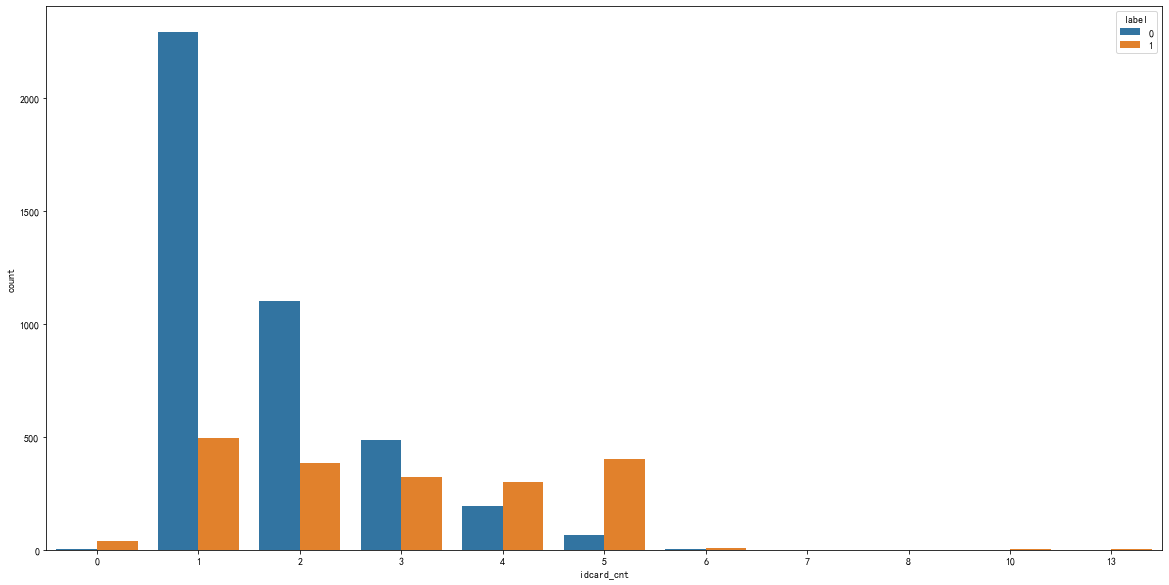

In [123]:
plt.figure(figsize=(20,10))
sns.countplot(x='idcard_cnt',hue='label',data=train_user)

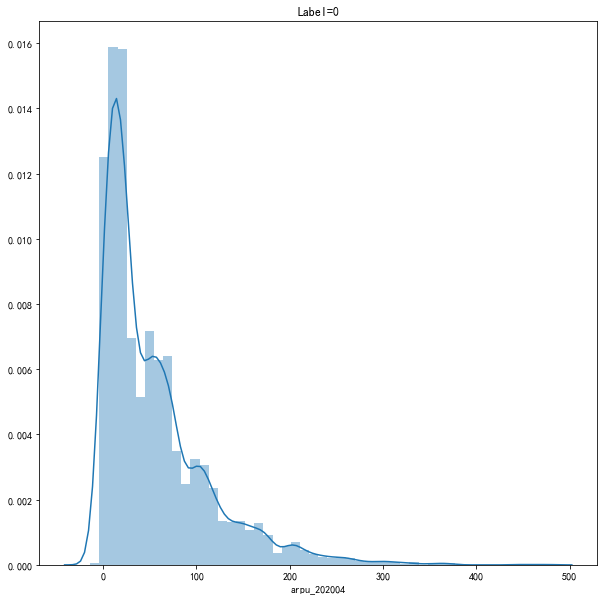

In [316]:
plt.figure(figsize=(10,10))
sns.distplot(train_user.loc[train_user.label==0]['arpu_202004'])
#sns.distplot(train_user.loc[train_user.label==1]['arpu_202004'])
plt.title('Label=0')
plt.show()

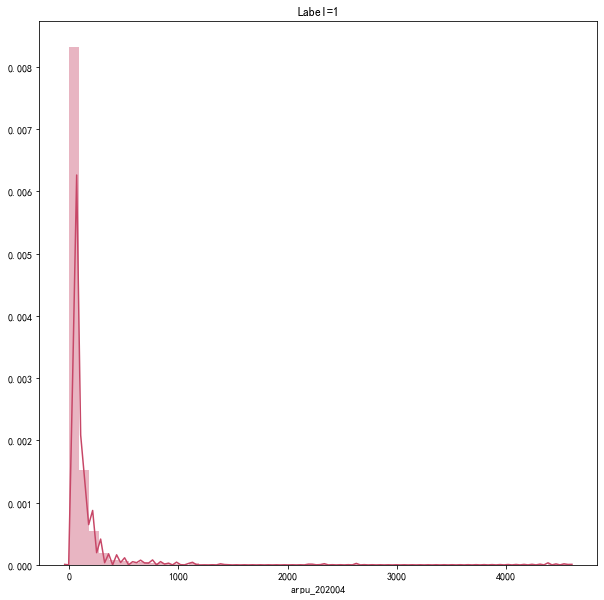

In [319]:
plt.figure(figsize=(10,10))
#sns.distplot(train_user.loc[train_user.label==0]['arpu_202004'])
sns.distplot(train_user.loc[train_user.label==1]['arpu_202004'],color='#c74767')
plt.title('Label=1')
plt.show()

## 城市、区域编码

In [13]:
for f in tqdm(['city_name', 'county_name']):
    lbl = LabelEncoder()
    df_user[f] = df_user[f].fillna('NA')
    df_user[f] = lbl.fit_transform(df_user[f].astype(str))
    
df_user.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 166.69it/s]


,phone_no_m,city_name,county_name,idcard_cnt,label,arpu_202004
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a...,16,97,1,0.0,45.0
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34d...,10,82,1,0.0,60.0
2,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c...,11,160,2,0.0,63.0
3,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f...,11,181,2,0.0,23.2
4,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d...,10,82,1,0.0,50.0


# voc

In [20]:
train_voc = pd.read_csv(r'E:\Term2\数据挖掘\pre\rawdata\train\train_voc.csv')
test_voc = pd.read_csv(r'E:\Term2\数据挖掘\pre\rawdata\test\test_voc.csv')

train_voc['start_datetime'] = train_voc['start_datetime'].astype('datetime64')
test_voc['start_datetime'] = test_voc['start_datetime'].astype('datetime64')

In [15]:
len(train_voc)

5015430

In [16]:
ex=train_voc.phone_no_m.iloc[0]
train_voc.loc[train_voc.phone_no_m==ex].calltype_id.unique()

array([2, 1], dtype=int64)

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(df_voc.loc[df_voc.call_dur]['call_dur'])
plt.tick_params(labelsize=12)
plt.xlabel('Call_dur',size=15,family= 'Times New Roman')

NameError: name 'df_voc' is not defined

<Figure size 720x576 with 0 Axes>

In [193]:
df_voc['call_dur_cut']= pd.cut(df_voc['call_dur'],bins=[0,15,30,60,100,400,max(df_voc.call_dur)+1],labels=[0,1,2,3,4,5],right=False)   #按四分位数切割
df_voc['call_dur_cut'].value_counts()

1    245905
2    234619
0    196541
4    151236
3    124274
5     33091
Name: call_dur_cut, dtype: int64

In [148]:
voc_label=train_voc.merge(train_user['phone_no_m','label'])

array([ 175,   33,   39, ..., 3264, 2454, 3405], dtype=int64)

Text(0, 0.5, 'Count')

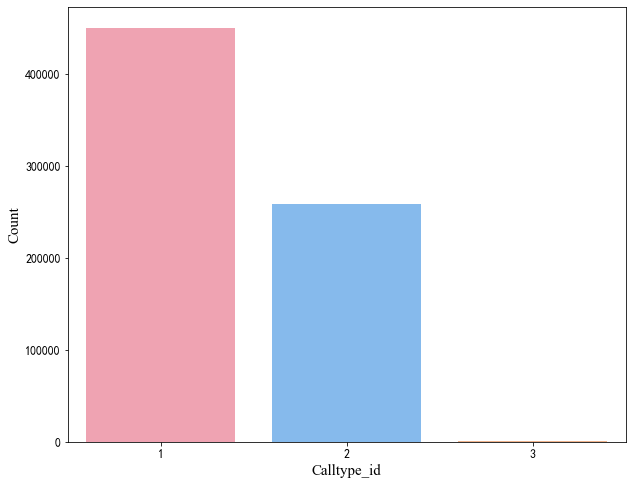

In [338]:
plt.figure(figsize=(10,8))
sns.countplot(train_voc['calltype_id'],palette=['#fc96aa','#75bbfd','#ffb07c'])
plt.tick_params(labelsize=12)
plt.xlabel('Calltype_id',size=15,family= 'Times New Roman')
plt.ylabel('Count',size=15,family= 'Times New Roman')

In [139]:
phonelabel=train_user[['phone_no_m','label']]
phonecall=train_voc[['phone_no_m','call_dur']]
label_call=pd.merge(phonecall,phonelabel,how='left',on='phone_no_m')
label_call.head()

,phone_no_m,call_dur,label
0,b3994b4c46e39954cfe0cb8ebd2a79703a2ace6612fa18241509e8b2dfe9d75f503823b6df2d10180a9033ccd22390aaeda397037ca4cd26604d6db6e3470874,175,0
1,b3994b4c46e39954cfe0cb8ebd2a79703a2ace6612fa18241509e8b2dfe9d75f503823b6df2d10180a9033ccd22390aaeda397037ca4cd26604d6db6e3470874,33,0
2,c5502a6d3e4cabaf8c0e298c4aac693b6e80835d50d4e4f393d8426bd49c0d4d00c3959d2a2c8341410e57af28bee6dc5c80dbad7cf147018ec0ece7bfa0cf5f,39,0
3,c5502a6d3e4cabaf8c0e298c4aac693b6e80835d50d4e4f393d8426bd49c0d4d00c3959d2a2c8341410e57af28bee6dc5c80dbad7cf147018ec0ece7bfa0cf5f,32,0
4,2bdbc0a45d6228970b353d691e2ec229f0cf60790a1a39d5e01c0175b5e20cd2ca7d39aff8506741884fd7a4cd4fd9fdec5112ddb764d81c2983752c989f1078,3,0


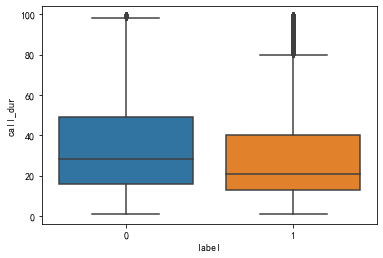

In [147]:
sns.boxplot(x='label',y='call_dur',data=label_call.loc[label_call.call_dur<100])

In [19]:
# 同样只取最后一个月的数据
#train_voc= train_voc[train_voc['start_datetime'] >= '2020-03-01 00:00:00']

In [43]:
train_voc_3= train_voc_3.reset_index(drop=True)

In [21]:
train_voc_2= train_voc[train_voc['start_datetime'] >= '2020-02-01 00:00:00']

In [22]:
train_voc_3= train_voc[train_voc['start_datetime'] >= '2020-03-01 00:00:00']

In [181]:
train_voc_1= train_voc[train_voc['start_datetime'] >= '2020-01-01 00:00:00']

In [234]:
df_voc = pd.concat([train_voc_3, test_voc])

In [235]:
##  添加标签： 通话呼出城市与号码开户城市是否一样
#temp=pd.merge(df_voc,df_user[['phone_no_m','city_name']],how='left',on='phone_no_m')
#temp['flag_same_city']=temp['city_name_x']==temp['city_name_y']

In [236]:
# 时间切割
df_voc['voc_day'] = df_voc['start_datetime'].dt.day
df_voc['voc_hour'] = df_voc['start_datetime'].dt.hour
df_voc['voc_weekday']=df_voc['start_datetime'].dt.dayofweek
#df_voc['voc_ts'] = np.datetime64(df_voc['start_datetime'], unit='ns').dt.total_seconds().astype(int)
#df_voc = df_voc.sort_values(by='voc_ts').reset_index(drop=True)

In [237]:
df_voc['voc_hour'].unique()

array([21, 18, 11, 15, 19,  9, 12, 14,  6, 20, 10, 13, 22,  8, 16, 17,  7,
        5,  1, 23,  0,  3,  2,  4], dtype=int64)

In [238]:
df_voc['voc_hour_label']= pd.cut(df_voc['voc_hour'],bins=[0,7,12,15,19,24],labels=[0,1,2,3,4],right=False)  

In [239]:
# 一天内通话次数统计量
df_voc['voc_day_count'] = df_voc.groupby(['phone_no_m', 'voc_day'])['phone_no_m'].transform('count')
df_voc['voc_day_count_max'] = df_voc.groupby('phone_no_m')['voc_day_count'].transform('max')
df_voc['voc_day_count_min'] = df_voc.groupby('phone_no_m')['voc_day_count'].transform('min')
df_voc['voc_day_count_mean'] = df_voc.groupby('phone_no_m')['voc_day_count'].transform('mean')
df_voc['voc_day_count_median'] = df_voc.groupby('phone_no_m')['voc_day_count'].transform('median')
df_voc['voc_day_count_std'] = df_voc.groupby('phone_no_m')['voc_day_count'].transform('std')

del df_voc['voc_day_count']

In [240]:
# 总量
df_voc['voc_count'] = df_voc.groupby('phone_no_m')['phone_no_m'].transform('count')

In [241]:
#主叫通话
calltype1=df_voc.loc[df_voc.calltype_id==1]
calltype1=calltype1.groupby('phone_no_m')['calltype_id'].agg(calltype_1='count').reset_index()
#calltype2.set_index('phone_no_m').groupby('phone_no_m')['calltype_id'].transform('count').reset_index()
df_voc=df_voc.merge(calltype1,how='left',on='phone_no_m')
df_voc['calltype_1'].fillna(0)
df_voc['calltype_1_rate']=df_voc['calltype_1']/df_voc['voc_count'] 

In [242]:
# 一小时内通话次数统计量
df_voc['voc_hour_count'] = df_voc.groupby(['phone_no_m', 'voc_hour'])['phone_no_m'].transform('count')
df_voc['voc_hour_count_max'] = df_voc.groupby('phone_no_m')['voc_hour_count'].transform('max')
df_voc['voc_hour_count_min'] = df_voc.groupby('phone_no_m')['voc_hour_count'].transform('min')
df_voc['voc_hour_count_mean'] = df_voc.groupby('phone_no_m')['voc_hour_count'].transform('mean')
df_voc['voc_hour_count_median'] = df_voc.groupby('phone_no_m')['voc_hour_count'].transform('median')
df_voc['voc_hour_count_std'] = df_voc.groupby('phone_no_m')['voc_hour_count'].transform('std')

del df_voc['voc_hour_count']

In [243]:
#df_voc['voc_dur_sum']=df_voc.groupby(['phone_no_m'])['call_dur'].transform('sum')
#df_voc['voc_dur_mean']=df_voc.groupby(['phone_no_m'])['call_dur'].transform('mean')
#df_voc['voc_dur_std']=df_voc.groupby(['phone_no_m'])['call_dur'].transform('std')

In [244]:
def unique_count(data):
    res=len(data.unique())
    return res

In [245]:
#打电话的总人数
df_voc['voc_people_count']=df_voc.groupby('phone_no_m')['opposite_no_m'].transform(unique_count)

#给同一个人打电话的次数
df_voc['voc_opposite_same_count']=df_voc.groupby(['phone_no_m', 'opposite_no_m'])['phone_no_m'].transform('count')
#相关统计量
df_voc['voc_opposite_same_count_max']=df_voc.groupby('phone_no_m')['voc_opposite_same_count'].transform('max')
df_voc['voc_opposite_same_count_min']=df_voc.groupby('phone_no_m')['voc_opposite_same_count'].transform('min')
df_voc['voc_opposite_same_count_mean']=df_voc.groupby('phone_no_m')['voc_opposite_same_count'].transform('mean')
df_voc['voc_opposite_same_count_median']=df_voc.groupby('phone_no_m')['voc_opposite_same_count'].transform('median')
df_voc['voc_opposite_same_count_std']=df_voc.groupby('phone_no_m')['voc_opposite_same_count'].transform('std')

del df_voc['voc_opposite_same_count']

#给同一个人打电话的时长
df_voc['voc_opposite_same_hour_count']=df_voc.groupby(['phone_no_m', 'opposite_no_m'])['call_dur'].transform('sum')
#相关统计量
df_voc['voc_opposite_same_hour_max']=df_voc.groupby('phone_no_m')['voc_opposite_same_hour_count'].transform('max')
df_voc['voc_opposite_same_hour_min']=df_voc.groupby('phone_no_m')['voc_opposite_same_hour_count'].transform('min')
df_voc['voc_opposite_same_hour_median']=df_voc.groupby('phone_no_m')['voc_opposite_same_hour_count'].transform('median')
df_voc['voc_opposite_same_hour_mean']=df_voc.groupby('phone_no_m')['voc_opposite_same_hour_count'].transform('mean')
df_voc['voc_opposite_same_hour_std']=df_voc.groupby('phone_no_m')['voc_opposite_same_hour_count'].transform('std')

del df_voc['voc_opposite_same_hour_count']


#一天内打电话的总人数
df_voc['voc_day_people_count']=df_voc.groupby(['phone_no_m','voc_day'])['opposite_no_m'].transform(unique_count)
#相关统计量
df_voc['voc_day_people_count_max']=df_voc.groupby('phone_no_m')['voc_day_people_count'].transform('max')
df_voc['voc_day_people_count_min']=df_voc.groupby('phone_no_m')['voc_day_people_count'].transform('min')
df_voc['voc_day_people_count_median']=df_voc.groupby('phone_no_m')['voc_day_people_count'].transform('median')
df_voc['voc_day_people_count_mean']=df_voc.groupby('phone_no_m')['voc_day_people_count'].transform('mean')
df_voc['voc_day_people_count_std']=df_voc.groupby('phone_no_m')['voc_day_people_count'].transform('std')
del df_voc['voc_day_people_count']

In [246]:
#一天内给同一个人打电话的次数
df_voc['voc_day_same_count']=df_voc.groupby(['phone_no_m', 'opposite_no_m','voc_day'])['phone_no_m'].transform('count')
#相关统计量
df_voc['voc_day_same_count_max']=df_voc.groupby('phone_no_m')['voc_day_same_count'].transform('max')
df_voc['voc_day_same_count_min']=df_voc.groupby('phone_no_m')['voc_day_same_count'].transform('min')
df_voc['voc_day_same_count_mean']=df_voc.groupby('phone_no_m')['voc_day_same_count'].transform('mean')
df_voc['voc_day_same_count_median']=df_voc.groupby('phone_no_m')['voc_day_same_count'].transform('median')
df_voc['voc_day_same_count_std']=df_voc.groupby('phone_no_m')['voc_day_same_count'].transform('std')

del df_voc['voc_day_same_count']

#一天内给同一个人打电话的时长
df_voc['voc_day_same_hour_count']=df_voc.groupby(['phone_no_m', 'opposite_no_m','voc_day'])['call_dur'].transform('sum')
#相关统计量
df_voc['voc_day_same_hour_max']=df_voc.groupby('phone_no_m')['voc_day_same_hour_count'].transform('max')
df_voc['voc_day_same_hour_min']=df_voc.groupby('phone_no_m')['voc_day_same_hour_count'].transform('min')
df_voc['voc_day_same_hour_mean']=df_voc.groupby('phone_no_m')['voc_day_same_hour_count'].transform('mean')
df_voc['voc_day_same_hour_median']=df_voc.groupby('phone_no_m')['voc_day_same_hour_count'].transform('median')
df_voc['voc_day_same_hour_std']=df_voc.groupby('phone_no_m')['voc_day_same_hour_count'].transform('std')

del df_voc['voc_day_same_hour_count']

In [247]:
def mode_func(data):
    res=np.argmax(np.bincount(data))
    return res

In [248]:
#通话次数最多的星期
df_voc['voc_week_mode']=df_voc.groupby('phone_no_m')['voc_weekday'].transform(mode_func)

In [249]:
df_voc.head()

,phone_no_m,opposite_no_m,calltype_id,start_datetime,call_dur,city_name,county_name,imei_m,voc_day,voc_hour,...,voc_day_same_count_min,voc_day_same_count_mean,voc_day_same_count_median,voc_day_same_count_std,voc_day_same_hour_max,voc_day_same_hour_min,voc_day_same_hour_mean,voc_day_same_hour_median,voc_day_same_hour_std,voc_week_mode
0,b3994b4c46e39954cfe0cb8ebd2a79703a2ace6612fa18...,1b01124a6ad0443ad868757c6594a605a0c5179c2b5b57...,1,2020-03-22 21:38:40,175,NaN,NaN,90ba61111dad175330029e10da8264a86dfdb3a281ccb8...,22,21,...,1,1.688000,1.0,0.919467,628,1,120.160000,62.0,132.515696,0
1,b3994b4c46e39954cfe0cb8ebd2a79703a2ace6612fa18...,1b01124a6ad0443ad868757c6594a605a0c5179c2b5b57...,1,2020-03-23 18:05:41,33,NaN,NaN,90ba61111dad175330029e10da8264a86dfdb3a281ccb8...,23,18,...,1,1.688000,1.0,0.919467,628,1,120.160000,62.0,132.515696,0
2,c5502a6d3e4cabaf8c0e298c4aac693b6e80835d50d4e4...,f1b73c46a691c068bfd38253e20e882d4993c8d3e58016...,1,2020-03-01 11:24:37,39,NaN,NaN,e1e1149b2c06e9972293c457293abb32ad05b0c82b3b64...,1,11,...,1,1.200000,1.0,0.410391,39,5,18.250000,16.0,8.415994,6
3,c5502a6d3e4cabaf8c0e298c4aac693b6e80835d50d4e4...,5bc6d97a3017578edfa7979fa43653cd74bad827f18337...,1,2020-03-01 11:23:44,32,NaN,NaN,e1e1149b2c06e9972293c457293abb32ad05b0c82b3b64...,1,11,...,1,1.200000,1.0,0.410391,39,5,18.250000,16.0,8.415994,6
4,2bdbc0a45d6228970b353d691e2ec229f0cf60790a1a39...,c42eeddeff98feb87860441ea6548f8bda2a080c935e02...,2,2020-03-03 15:34:21,3,NaN,NaN,3e808a14fa2aa61524c70f262539d1c8532b8e3a8c7c87...,3,15,...,1,1.974359,1.0,1.485640,1475,3,318.628205,164.0,418.374129,0


In [252]:
df_train_voc=df_voc[df_voc.phone_no_m.isin(list(train_voc.phone_no_m))]

In [253]:
df_train_voc.to_excel(r'E:\Term2\数据挖掘\pre\df_train_voc.xlsx',index=0)

In [ ]:
df_train_voc.to_cvs(r'E:\Term2\数据挖掘\pre\df_train_voc.xlsx',index=0)

# sms

In [ ]:
train_sms = pd.read_csv(r'E:\Term2\数据挖掘\pre\rawdata\train\train_sms.csv')
test_sms = pd.read_csv(r'E:\Term2\数据挖掘\pre\rawdata\test\test_sms.csv')

train_sms['request_datetime'] = train_sms['request_datetime'].astype('datetime64')
test_sms['request_datetime'] = test_sms['request_datetime'].astype('datetime64')

Text(0, 0.5, 'Count')

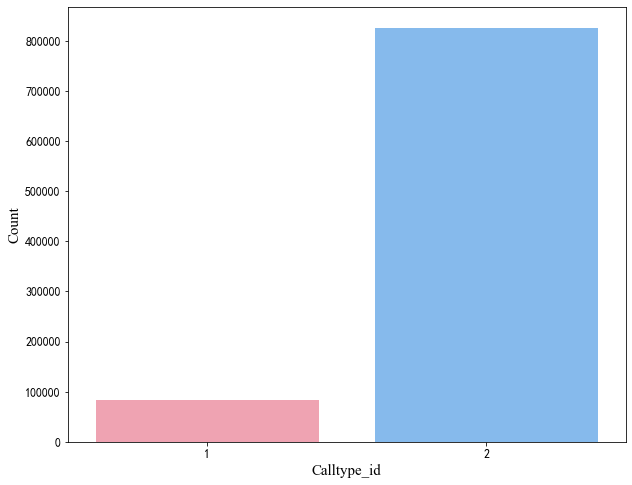

In [776]:
plt.figure(figsize=(10,8))
sns.countplot(train_sms_3['calltype_id'],palette=['#fc96aa','#75bbfd'])
plt.tick_params(labelsize=12)
plt.xlabel('Calltype_id',size=15,family= 'Times New Roman')
plt.ylabel('Count',size=15,family= 'Times New Roman')

In [254]:
# 同样只取最后一个月的数据
train_sms_3 = train_sms[train_sms['request_datetime'] >= '2020-03-01 00:00:00']
train_sms_1 = train_sms[train_sms['request_datetime'] >= '2020-01-01 00:00:00']
train_sms_3= train_sms_3.reset_index(drop=True)

In [777]:
train_sms_3.columns

Index(['phone_no_m', 'opposite_no_m', 'calltype_id', 'request_datetime'], dtype='object')

In [255]:
df_sms = pd.concat([train_sms_3, test_sms])

In [256]:
# 时间切割

df_sms['sms_day'] = df_sms['request_datetime'].dt.day
df_sms['sms_hour'] = df_sms['request_datetime'].dt.hour
#df_sms['sms_ts'] = pd.to_timedelta(df_sms['request_datetime'], unit='ns').dt.total_seconds().astype(int)

#df_sms = df_sms.sort_values(by='sms_ts').reset_index(drop=True)

In [257]:
# 总量

df_sms['sms_count'] = df_sms.groupby('phone_no_m')['phone_no_m'].transform('count')

In [258]:
#短信下行比例
calltype2=df_sms.loc[df_sms.calltype_id==2]
calltype2=calltype2.groupby('phone_no_m')['calltype_id'].agg(calltype_2='count').reset_index()
#calltype2.set_index('phone_no_m').groupby('phone_no_m')['calltype_id'].transform('count').reset_index()
df_sms=df_sms.merge(calltype2,how='left',on='phone_no_m')
df_sms['calltype_2'].fillna(0)
df_sms['calltype_2_rate']=df_sms['calltype_2']/df_sms['sms_count'] 

In [259]:
#df_sms['sms_hour_label']=np.zeros(len(df_sms))
#for i in range(len(df_sms)):
#    if df_sms['sms_hour'].iloc[i] in [0,1,2,3,4,5,6]:
#        df_sms['sms_hour_label'].iloc[i]=0
#    elif df_sms['sms_hour'].iloc[i] in [7,8,9,10,11]:
#        df_sms['sms_hour_label'].iloc[i]=1
#    elif df_sms['sms_hour'].iloc[i] in [12,13,14]:
#        df_sms['sms_hour_label'].iloc[i]=2
#    elif df_sms['sms_hour'].iloc[i] in [15,16,17,18]:
#        df_sms['sms_hour_label'].iloc[i]=3
#    elif df_sms['sms_hour'].iloc[i] in [19,20,21,22,23]:
#        df_sms['sms_hour_label'].iloc[i]=4

In [260]:
df_sms['sms_hour_label']= pd.cut(df_sms['sms_hour'],bins=[0,6,11,14,18,24],labels=[0,1,2,3,4],right=False)

In [261]:
# 一天内短信统计量

df_sms['sms_day_count'] = df_sms.groupby(['phone_no_m', 'sms_day'])['phone_no_m'].transform('count')
df_sms['sms_day_count_max'] = df_sms.groupby('phone_no_m')['sms_day_count'].transform('max')
df_sms['sms_day_count_min'] = df_sms.groupby('phone_no_m')['sms_day_count'].transform('min')
df_sms['sms_day_count_median'] = df_sms.groupby('phone_no_m')['sms_day_count'].transform('median')
df_sms['sms_day_count_mean'] = df_sms.groupby('phone_no_m')['sms_day_count'].transform('mean')
df_sms['sms_day_count_std'] = df_sms.groupby('phone_no_m')['sms_day_count'].transform('std')

del df_sms['sms_day_count']

In [262]:
# 一小时内短信统计量

df_sms['sms_hour_count'] = df_sms.groupby(['phone_no_m', 'sms_hour'])['phone_no_m'].transform('count')
df_sms['sms_hour_count_max'] = df_sms.groupby('phone_no_m')['sms_hour_count'].transform('max')
df_sms['sms_hour_count_min'] = df_sms.groupby('phone_no_m')['sms_hour_count'].transform('min')
df_sms['sms_hour_count_mean'] = df_sms.groupby('phone_no_m')['sms_hour_count'].transform('mean')
df_sms['sms_hour_count_median'] = df_sms.groupby('phone_no_m')['sms_hour_count'].transform('median')
df_sms['sms_hour_count_std'] = df_sms.groupby('phone_no_m')['sms_hour_count'].transform('std')

del df_sms['sms_hour_count']

In [263]:
#发短信的总人数
df_sms['sms_people_count']=df_sms.groupby('phone_no_m')['opposite_no_m'].transform(unique_count)
#给同一个人发短信的次数
df_sms['sms_same_count']=df_sms.groupby(['phone_no_m', 'opposite_no_m'])['phone_no_m'].transform('count')
#相关统计量
df_sms['sms_same_count_max']=df_sms.groupby('phone_no_m')['sms_same_count'].transform('max')
df_sms['sms_same_count_min']=df_sms.groupby('phone_no_m')['sms_same_count'].transform('min')
df_sms['sms_same_count_mean']=df_sms.groupby('phone_no_m')['sms_same_count'].transform('mean')
df_sms['sms_same_count_median']=df_sms.groupby('phone_no_m')['sms_same_count'].transform('median')
df_sms['sms_same_count_std']=df_sms.groupby('phone_no_m')['sms_same_count'].transform('std')

del df_sms['sms_same_count']

#一天内发短信的总人数
df_sms['sms_day_people_count']=df_sms.groupby(['phone_no_m','sms_day'])['opposite_no_m'].transform(unique_count)
#相关统计量
df_sms['sms_day_people_count_max']=df_sms.groupby('phone_no_m')['sms_day_people_count'].transform('max')
df_sms['sms_day_people_count_min']=df_sms.groupby('phone_no_m')['sms_day_people_count'].transform('min')
df_sms['sms_day_people_count_mean']=df_sms.groupby('phone_no_m')['sms_day_people_count'].transform('mean')
df_sms['sms_day_people_count_median']=df_sms.groupby('phone_no_m')['sms_day_people_count'].transform('median')
df_sms['sms_day_people_count_std']=df_sms.groupby('phone_no_m')['sms_day_people_count'].transform('std')
del df_sms['sms_day_people_count']

#一天内给同一个人发短信的次数
df_sms['sms_day_same_count']=df_sms.groupby(['phone_no_m', 'opposite_no_m','sms_day'])['phone_no_m'].transform('count')
#相关统计量
df_sms['sms_day_same_count_max']=df_sms.groupby('phone_no_m')['sms_day_same_count'].transform('max')
df_sms['sms_day_same_count_min']=df_sms.groupby('phone_no_m')['sms_day_same_count'].transform('min')
df_sms['sms_day_same_count_mean']=df_sms.groupby('phone_no_m')['sms_day_same_count'].transform('mean')
df_sms['sms_day_same_count_median']=df_sms.groupby('phone_no_m')['sms_day_same_count'].transform('median')
df_sms['sms_day_same_count_std']=df_sms.groupby('phone_no_m')['sms_day_same_count'].transform('std')
del df_sms['sms_day_same_count']

In [ ]:
df_sms_type2=df_sms.loc[df_sms.calltype_id==2]

In [ ]:
#特征
df_sms_type2['sms_2_count']=df_sms_type2.groupby('phone_no_m')['phone_no_m'].transform('count')
df_sms_type2[]

In [264]:
df_sms['sms_weekday']=df_sms['request_datetime'].dt.dayofweek
#通话次数最多的星期
df_sms['sms_week_mode']=df_sms.groupby('phone_no_m')['sms_weekday'].transform(mode_func)

In [265]:
df_sms.head()

,phone_no_m,opposite_no_m,calltype_id,request_datetime,sms_day,sms_hour,sms_count,calltype_2,calltype_2_rate,sms_hour_label,...,sms_day_people_count_mean,sms_day_people_count_median,sms_day_people_count_std,sms_day_same_count_max,sms_day_same_count_min,sms_day_same_count_mean,sms_day_same_count_median,sms_day_same_count_std,sms_weekday,sms_week_mode
0,3c4adabd6c1eb2774054cdc67e8d1df09f89f4fd0b44fa...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-03-01 10:19:12,1,10,76,76.0,1.000000,1,...,1.552632,1.5,0.597656,7,1,2.526316,2.0,1.595608,6,4
1,3c4adabd6c1eb2774054cdc67e8d1df09f89f4fd0b44fa...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-03-01 10:19:12,1,10,76,76.0,1.000000,1,...,1.552632,1.5,0.597656,7,1,2.526316,2.0,1.595608,6,4
2,e531a69afd185e0e97fb35fd7caa0f5e2e4efc4a1c80f7...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-03-01 14:29:26,1,14,568,539.0,0.948944,3,...,7.705986,8.0,2.257615,24,1,4.954225,4.0,4.788804,6,3
3,e531a69afd185e0e97fb35fd7caa0f5e2e4efc4a1c80f7...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-03-01 14:29:26,1,14,568,539.0,0.948944,3,...,7.705986,8.0,2.257615,24,1,4.954225,4.0,4.788804,6,3
4,e531a69afd185e0e97fb35fd7caa0f5e2e4efc4a1c80f7...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-03-01 14:29:26,1,14,568,539.0,0.948944,3,...,7.705986,8.0,2.257615,24,1,4.954225,4.0,4.788804,6,3


In [266]:
df_train_sms=df_sms.loc[df_sms.phone_no_m.isin(list(train_sms.phone_no_m.unique()))]

In [267]:
df_train_sms.to_excel(r'E:\Term2\数据挖掘\pre\df_train_sms.xlsx',index=0)

# app

In [210]:
train_app = pd.read_csv(r'E:\Term2\数据挖掘\pre\rawdata\train\train_app.csv')
test_app = pd.read_csv(r'E:\Term2\数据挖掘\pre\rawdata\test\test_app.csv')

In [211]:
a=train_app.phone_no_m[0]
len(train_app.loc[train_app.phone_no_m==a]['busi_name'].unique())

1

In [212]:
train_app.busi_name.value_counts()

微信                 38131
QQ                 34340
DNS                32239
高德导航               30288
腾讯视频               28786
                   ...  
Upalytics              1
HuLuWa                 1
Abc360                 1
Papago_Browsing        1
7天连锁酒店                 1
Name: busi_name, Length: 4994, dtype: int64

In [213]:
train_app.head()

,phone_no_m,busi_name,flow,month_id
0,416cec0f25b93f08bfd9cff44382c5da3a6346beb16a2c...,NaN,0.000000,NaN
1,26fcb7c6f4125ee5445756d4ff5346c29f2aff7d0f2e31...,NaN,0.000000,NaN
2,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,NaN,0.021529,2019-12
3,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,微信,0.001846,2019-12
4,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,高德导航,0.002288,2019-12


Text(0, 0.5, 'Count')

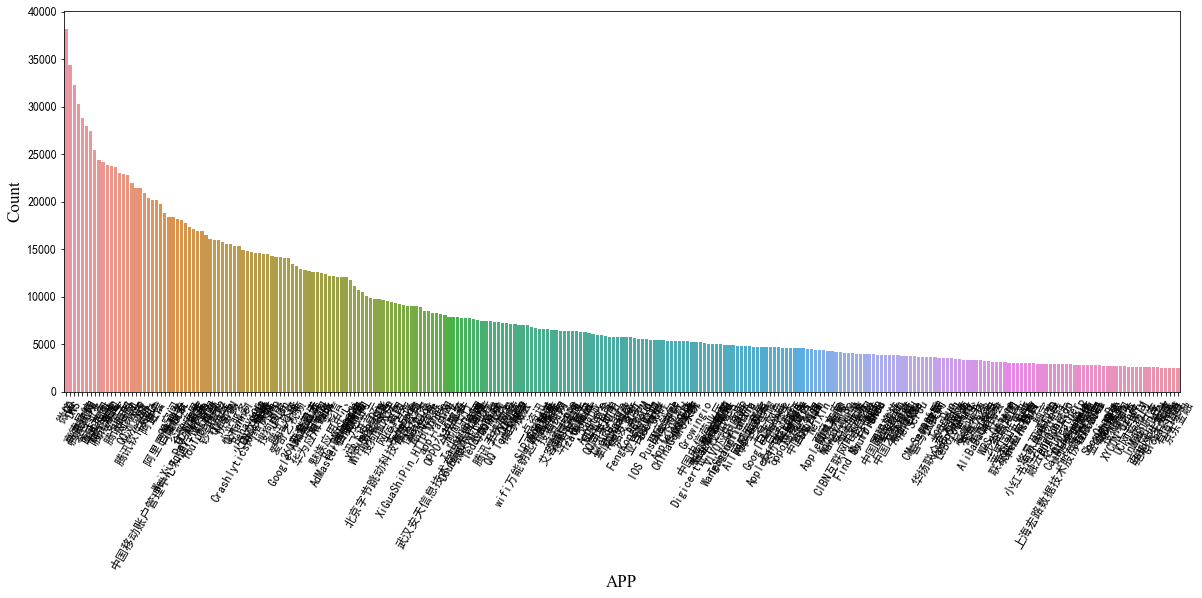

In [214]:
plt.figure(figsize=(20,7))

tem=train_app.busi_name.value_counts()
tem=tem[tem>2500]
tem
sns.countplot(train_app[train_app.busi_name.isin(tem.index)].busi_name,order=tem.index)
plt.xticks(rotation=60)
plt.tick_params(labelsize=12)
plt.xlabel('APP',size=17,family= 'Times New Roman')
plt.ylabel('Count',size=17,family= 'Times New Roman')

In [215]:
len(train_app.busi_name.unique())

4995

In [216]:
# 同样只取最后一个月的数据
train_app_3 = train_app[train_app['month_id'] >= '2020-03']
train_app_3= train_app_3.reset_index(drop=True)
df_app = pd.concat([train_app_3, test_app])

In [217]:
train_app.head()

,phone_no_m,busi_name,flow,month_id
0,416cec0f25b93f08bfd9cff44382c5da3a6346beb16a2c...,NaN,0.000000,NaN
1,26fcb7c6f4125ee5445756d4ff5346c29f2aff7d0f2e31...,NaN,0.000000,NaN
2,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,NaN,0.021529,2019-12
3,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,微信,0.001846,2019-12
4,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,高德导航,0.002288,2019-12


In [218]:
# 流量统计

df_app['total_flow'] = df_app.groupby('phone_no_m')['flow'].transform('sum')
df_app['flow_max'] = df_app.groupby('phone_no_m')['flow'].transform('max')
df_app['flow_min'] = df_app.groupby('phone_no_m')['flow'].transform('min')
df_app['flow_mean'] = df_app.groupby('phone_no_m')['flow'].transform('mean')
df_app['flow_median'] = df_app.groupby('phone_no_m')['flow'].transform('median')
df_app['flow_std'] = df_app.groupby('phone_no_m')['flow'].transform('std')

# 应用数
df_app['app_count'] = df_app.groupby('phone_no_m')['phone_no_m'].transform('count')

In [76]:
df_app.head()

,phone_no_m,busi_name,flow,month_id,total_flow,flow_max,flow_min,flow_mean,flow_std,app_count
0,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a...,NaN,125.060604,2020-03,5189.21207,2000.995233,0.00074,55.797979,250.141054,93
1,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a...,QQ,7.247598,2020-03,5189.21207,2000.995233,0.00074,55.797979,250.141054,93
2,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a...,旺信,0.008341,2020-03,5189.21207,2000.995233,0.00074,55.797979,250.141054,93
3,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a...,微信,584.027821,2020-03,5189.21207,2000.995233,0.00074,55.797979,250.141054,93
4,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a...,起点读书,5.342432,2020-03,5189.21207,2000.995233,0.00074,55.797979,250.141054,93


In [38]:
df_app.month_id.unique()

array(['2020-03', '2020-04', nan], dtype=object)

In [106]:
list(df_app.busi_name.unique())

[nan,
 'QQ',
 '旺信',
 '微信',
 '起点读书',
 '掌阅iReader',
 'qq空间',
 'Qzone',
 '百度地图',
 '腾讯地图',
 '高德导航',
 '腾讯视频',
 '芒果TV',
 '爱奇艺视频',
 'RTP',
 'RTCP',
 'RTMFP',
 '听云',
 'QQ音乐',
 '酷狗音乐',
 '应用宝',
 'oppo应用商店',
 '魅族应用中心',
 '支付宝',
 '财付通',
 'WeiXin_Pay_Action',
 '腾讯动漫',
 '爱奇艺PPS',
 'Other VoIP',
 '手机百度',
 '大众点评',
 '腾讯网',
 '新浪网',
 '网易网',
 '腾讯新闻',
 '搜狗搜索',
 '今日头条',
 '腾讯软件中心',
 'UC浏览器',
 'QQ浏览器',
 '网页浏览',
 'QQ TongXunLu',
 'QQ商店',
 'WeiZongYinHang',
 '阿里巴巴服务',
 '个推',
 'OPPO公共服务',
 '小米服务',
 '友盟+',
 'Imtmp',
 '武汉安天信息技术有限责任公司',
 'Teddymobile',
 '中国移动账户管理中心和通行证门户',
 'MIS系统',
 'wifi万能钥匙广告系统',
 'CM Security',
 '淘宝',
 '亚马逊购物',
 '美团',
 '拼多多',
 'NearMe云笔记',
 '阿里云',
 'QiXiuZhiBo',
 'KuGouZhiBo',
 '搜狗输入法',
 'WiFI万能钥匙',
 'DNS',
 'WAP2',
 'STUN',
 'NTP',
 'HTTPS',
 'SSL',
 '谷歌应用',
 'Ksmobile',
 'YumChina_Browsing',
 '钞针系统',
 'Coloros',
 '2o7',
 'Qchannel',
 'FXLTSBL',
 'YFCloud',
 'QQ群',
 'HiLaiDian_Browsing',
 '咪咕阅读',
 '熊猫看书',
 '纵横小说',
 'YouTube视频',
 '百度视频',
 '微视',
 '抖音',
 '火山小视频',
 '蜻蜓FM',
 'VIVO应用商店',
 '农行掌上银行',
 

# 合并

In [619]:
df_user.shape, df_voc.shape, df_sms.shape, df_app.shape

((8151, 6), (985666, 52), (1319506, 38), (512100, 11))

In [692]:
df_voc_1= df_voc[['phone_no_m', 'calltype_1_rate', #'call_dur',
                  'voc_day', 
                  'voc_hour',
                  'voc_weekday',
                 'voc_day_count_max',
                  #'voc_day_count_min', 
                  #'voc_day_count_mean',  
                  'voc_day_count_median',
                  'voc_day_count_std', 
                 'voc_hour_count_max',
                  #'voc_hour_count_min', 
                 #'voc_hour_count_mean',
                  'voc_hour_count_median',
                  'voc_hour_count_std',
                 'voc_count', 
                  'voc_people_count',
                'voc_opposite_same_count_max',
                #'voc_opposite_same_count_min',
                'voc_opposite_same_count_mean',
                #'voc_opposite_same_count_median',
                  'voc_opposite_same_count_std',
                
                #'voc_opposite_same_hour_max',
                #'voc_opposite_same_hour_min',
                #'voc_opposite_same_hour_mean',
                  'voc_opposite_same_hour_median',
                  'voc_opposite_same_hour_std',
                 'voc_day_people_count_max',
                  #'voc_day_people_count_min',
                 #'voc_day_people_count_mean',  
                  'voc_day_people_count_median',
                  'voc_day_people_count_std',
               # 'voc_day_same_count_max','voc_day_same_count_min',
                #'voc_day_same_count_mean', 
                'voc_day_same_count_median',
                'voc_day_same_count_std',
                'voc_day_same_hour_max',
                 #'voc_day_same_hour_min',
                'voc_day_same_hour_mean',
                  'voc_day_same_hour_median',
                  'voc_day_same_hour_std',
                #'call_dur_cut',
                #'voc_hour_label',
                #'voc_week_mode'
                 ]].drop_duplicates(subset=['phone_no_m'])

In [663]:
df_voc_2= df_voc[['phone_no_m', 'calltype_1_rate', #'call_dur',
                  'voc_day', 
                  'voc_hour',
                  'voc_weekday',
                 'voc_day_count_max',
                  'voc_day_count_min', 
                  'voc_day_count_mean',  
                  'voc_day_count_median',
                  'voc_day_count_std', 
                 'voc_hour_count_max',
                  'voc_hour_count_min', 
                 'voc_hour_count_mean',
                  'voc_hour_count_median',
                  'voc_hour_count_std',
                 'voc_count', 
                  'voc_people_count',
                'voc_opposite_same_count_max',
                'voc_opposite_same_count_min',
                'voc_opposite_same_count_mean',
                'voc_opposite_same_count_median',
                  'voc_opposite_same_count_std',
                
                'voc_opposite_same_hour_max',
                'voc_opposite_same_hour_min',
                'voc_opposite_same_hour_mean',
                  'voc_opposite_same_hour_median',
                  'voc_opposite_same_hour_std',
                 'voc_day_people_count_max',
                  'voc_day_people_count_min',
                 'voc_day_people_count_mean',  
                  'voc_day_people_count_median',
                  'voc_day_people_count_std',
               'voc_day_same_count_max','voc_day_same_count_min',
            'voc_day_same_count_mean', 
                'voc_day_same_count_median',
                'voc_day_same_count_std',
                'voc_day_same_hour_max',
                 'voc_day_same_hour_min',
                'voc_day_same_hour_mean',
                  'voc_day_same_hour_median',
                  'voc_day_same_hour_std',
                #'call_dur_cut',
                #'voc_hour_label',
                #'voc_week_mode'
                 ]].drop_duplicates(subset=['phone_no_m'])

In [621]:
df_train_user= pd.merge(df_user, df_voc_1, how='left', on='phone_no_m')
df_train_user=df_train_user[df_train_user.label.notna()]
df_train_user.to_excel('E:\Term2\数据挖掘\pre\df_voc_user.xlsx',index=0)

In [622]:
df_train_user.voc_day.unique()

array([17., 30.,  9., 24.,  8., 18., nan, 26., 16., 15., 11., 21.,  4.,
       28., 13., 14., 10., 22., 23.,  5.,  2.,  7., 27., 31., 29.,  3.,
       25., 20.,  6., 19.,  1., 12.])

Text(0.5, 1.0, 'Voc_opposite_same_count_max')

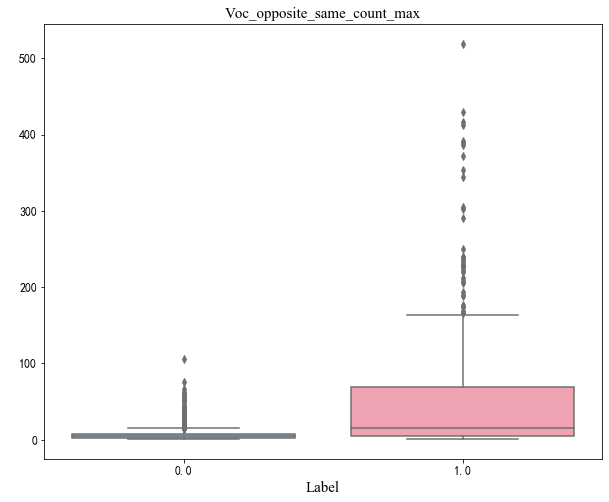

In [623]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df_train_user['label'],y=df_train_user['voc_day_people_count_max'],palette=['#75bbfd','#fc96aa'])
plt.tick_params(labelsize=12)
plt.xlabel('Label',size=15,family= 'Times New Roman')
plt.ylabel(' ')
plt.title('Voc_opposite_same_count_max',size=15,family= 'Times New Roman')

In [624]:
df_train_user.loc[df_train_user.label==1].voc_people_count.mean()

231.7509778357236

In [694]:
df_sms_1 = df_sms[['phone_no_m', 
                   'sms_day',
                   'sms_hour',
                   'sms_weekday',
                  'sms_day_count_max', 
                  'sms_day_count_min', 
                   #'sms_day_count_mean',
                   'sms_day_count_median',
                   'sms_day_count_std',
                   'sms_count',
                 'sms_hour_count_max', 
                #'sms_hour_count_min',
                 #'sms_hour_count_mean', 
                 'sms_hour_count_median',
                   'sms_hour_count_std',
                   'sms_people_count', 
                  'sms_same_count_max',
                   #'sms_same_count_min',
                 'sms_same_count_mean', 
                  # 'sms_same_count_median',
                   'sms_same_count_std',
                 'sms_day_people_count_max',
                #'sms_day_people_count_min',
                 'sms_day_people_count_mean', 
                   #'sms_day_people_count_median',
                   'sms_day_people_count_std',
                 'sms_day_same_count_max',#'sms_day_same_count_min',
                 'sms_day_same_count_mean',#'sms_day_same_count_median',
                 'sms_day_same_count_std','calltype_2_rate',
                # 'sms_hour_label',# 'sms_week_mode'
                ]].drop_duplicates(subset=['phone_no_m'])

In [664]:
df_sms_2 = df_sms[['phone_no_m', 
                   'sms_day',
                   'sms_hour',
                   'sms_weekday',
                  'sms_day_count_max', 
                  'sms_day_count_min', 
                   'sms_day_count_mean',
                   'sms_day_count_median',
                   'sms_day_count_std',
                   'sms_count',
                 'sms_hour_count_max', 
                'sms_hour_count_min',
                 'sms_hour_count_mean', 
                 'sms_hour_count_median',
                   'sms_hour_count_std',
                   'sms_people_count', 
                  'sms_same_count_max',
                   'sms_same_count_min',
                 'sms_same_count_mean', 
                  'sms_same_count_median',
                   'sms_same_count_std',
                 'sms_day_people_count_max',
                'sms_day_people_count_min',
                 'sms_day_people_count_mean', 
                   'sms_day_people_count_median',
                   'sms_day_people_count_std',
                 'sms_day_same_count_max',
                   'sms_day_same_count_min',
                 'sms_day_same_count_mean',
                   'sms_day_same_count_median',
                 'sms_day_same_count_std','calltype_2_rate',
                # 'sms_hour_label',# 'sms_week_mode'
                ]].drop_duplicates(subset=['phone_no_m'])

In [626]:
df_sms_user= pd.merge(df_user, df_sms_1, how='left', on='phone_no_m')
df_sms_user=df_sms_user[df_sms_user.label.notna()]
df_sms_user.to_excel('E:\Term2\数据挖掘\pre\df_sms_user.xlsx',index=0)

Text(0.5, 1.0, 'Sms_day_people_count_std')

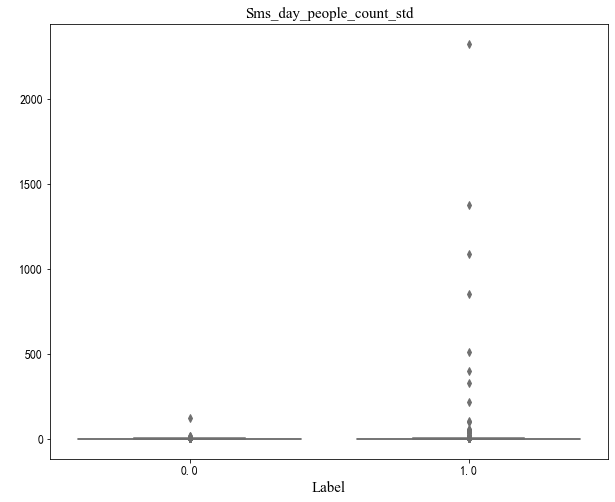

In [696]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df_sms_user['label'],y=df_sms_user[ 'sms_day_people_count_std'],palette=['#75bbfd','#fc96aa'])
plt.tick_params(labelsize=12)#.loc[df_sms_user.sms_same_count_max<2000]
plt.xlabel('Label',size=15,family= 'Times New Roman')
plt.ylabel(' ')
plt.title('Sms_day_people_count_std',size=15,family= 'Times New Roman')

Text(0.5, 1.0, 'Sms_day_people_count_std<20')

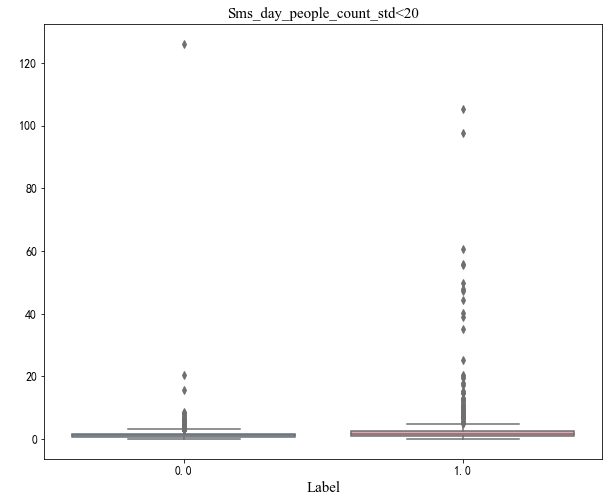

In [627]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df_sms_user.loc[df_sms_user.sms_day_people_count_std<200]['label'],y=df_sms_user.loc[df_sms_user.sms_day_people_count_std<200][ 'sms_day_people_count_std'],palette=['#75bbfd','#fc96aa'])
plt.tick_params(labelsize=12)#.loc[df_sms_user.sms_same_count_max<2000]
plt.xlabel('Label',size=15,family= 'Times New Roman')
plt.ylabel(' ')
plt.title('Sms_day_people_count_std<20',size=15,family= 'Times New Roman')



In [355]:
df_sms_1.loc[df_sms_1.sms_people_count>3000]

,phone_no_m,sms_day,sms_hour,sms_weekday,sms_day_count_max,sms_day_count_min,sms_day_count_mean,sms_day_count_median,sms_day_count_std,sms_count,...,sms_day_people_count_median,sms_day_people_count_std,sms_day_same_count_max,sms_day_same_count_min,sms_day_same_count_mean,sms_day_same_count_median,sms_day_same_count_std,calltype_2_rate,sms_hour_label,sms_week_mode
6136,f7aab09e6732c5ae7b75ad2127eb0e978250cf4f60e99c...,25,16,2,1976,2,1023.877274,709.0,524.845070,14789,...,178.0,126.132028,33,1,4.251200,4.0,1.944347,0.293529,3,0
36200,57d7b766fe96fa6926234e82c3c5c1d07b54225c173737...,26,14,3,2205,2,1823.128405,2205.0,519.019675,3598,...,2102.0,509.869091,63,1,2.731518,1.0,8.864605,0.334074,3,4
56135,7c92e46ad3d74108603a5a0b608b4b029ae264f0d00210...,9,13,0,5712,1,4240.157392,5712.0,1518.309698,11106,...,5412.0,1377.474354,45,1,1.257338,1.0,2.856189,0.064470,2,3
65997,35029bab2931c515aa2e50a9317324d3a42d63721655cf...,24,21,1,7842,1,6517.751165,7842.0,2372.611120,10304,...,7681.0,2327.674467,57,1,1.560947,1.0,4.778260,0.579872,4,4
154693,951f6c74809e8f43bade3bcd9c8011bef138de4053bf6c...,14,9,5,7387,1,7217.970507,7387.0,1101.417445,7561,...,7266.0,1088.892108,52,1,1.726888,1.0,5.094439,0.253802,1,3
529790,acbcabd4159574dec28192f1b9f0f18077251efeae1ad6...,18,14,2,7528,15,7513.059658,7528.0,334.721420,7543,...,7401.0,329.642458,44,1,1.316320,1.0,3.359982,0.011401,3,2
653089,4ae63fc7f1524ad15eee70f0c8d2d0e4a4bc420c16b3d6...,2,12,0,9689,1,9688.000206,9689.0,98.417480,9690,...,9609.0,97.604784,36,1,1.140970,1.0,2.132649,0.227864,2,0
836754,2f7ead17feea42cc9488b620ddcd824c0e7deed6bf51b9...,18,15,2,4972,35,4937.489315,4972.0,411.366092,5007,...,4781.0,398.117721,41,1,1.559617,1.0,4.176680,0.023367,3,3
910630,5246bdcae52f1d21e42e732b043ce05af4879f97586c0c...,1,19,2,3567,4,1686.666047,1396.0,773.520424,34436,...,239.0,129.443733,95,1,11.482344,6.0,14.199109,0.318388,4,3
947801,0094ee4c6902abb1b154bdd79a1144c5dd50e2964dfcae...,26,12,6,10987,1,10948.182115,10987.0,651.566777,11026,...,10732.0,637.086206,147,1,3.937965,1.0,19.324637,0.016234,2,1


In [628]:
df_app['flow_median'] = df_app.groupby('phone_no_m')['flow'].transform('median')
df_app_1= df_app[['phone_no_m', 'total_flow', 'flow_max', 'flow_min',#'flow_median',
                 'flow_mean', 
                  'flow_std', 'app_count']].drop_duplicates(subset=['phone_no_m'])

In [629]:
df_app_user= pd.merge(df_user, df_app_1, how='left', on='phone_no_m')
df_app_user=df_app_user[df_app_user.label.notna()]
df_app_user.to_excel('E:\Term2\数据挖掘\pre\df_app_user.xlsx',index=0)

Text(0.5, 1.0, 'Total_flow')

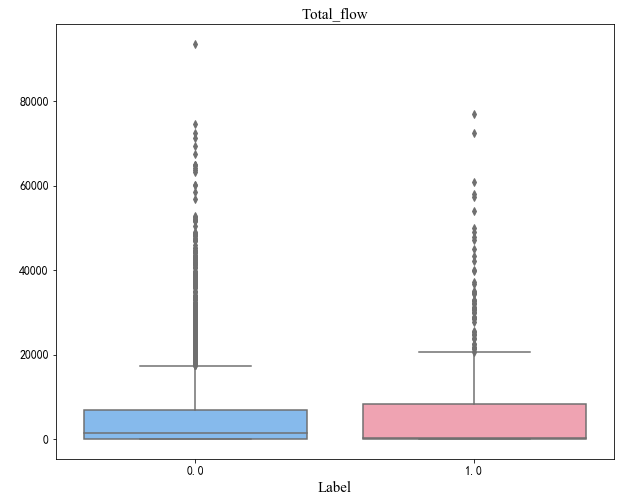

In [562]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df_app_user['label'],y=df_app_user['total_flow'],palette=['#75bbfd','#fc96aa'])
plt.tick_params(labelsize=12)#.loc[df_sms_user.sms_same_count_max<2000]
plt.xlabel('Label',size=15,family= 'Times New Roman')
plt.ylabel(' ')
plt.title('Total_flow',size=15,family= 'Times New Roman')



Text(0.5, 1.0, 'Flow_std')

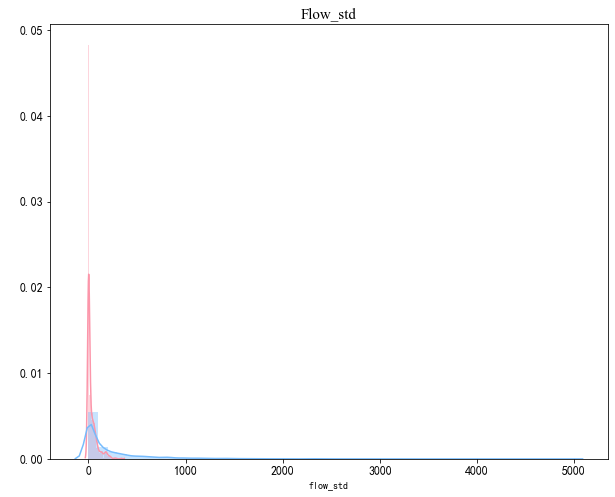

In [565]:
plt.figure(figsize=(10,8))
sns.distplot(df_app_user.loc[df_app_user.label==1]['flow_mean'],color='#fc96aa')
sns.distplot(df_app_user.loc[df_app_user.label==0]['flow_std'],color='#75bbfd')
plt.tick_params(labelsize=12)#.loc[df_sms_user.sms_same_count_max<2000]

plt.ylabel(' ')
plt.title('Flow_std',size=15,family= 'Times New Roman')


In [760]:
df = pd.merge(df_user, df_voc_1, how='left', on='phone_no_m')
df = pd.merge(df, df_sms_1, how='left', on='phone_no_m')
#df = pd.merge(df, df_app_1, how='left', on='phone_no_m')

df.head()

,phone_no_m,city_name,county_name,idcard_cnt,label,arpu_202004,calltype_1_rate,voc_day,voc_hour,voc_weekday,...,sms_same_count_max,sms_same_count_mean,sms_same_count_std,sms_day_people_count_max,sms_day_people_count_mean,sms_day_people_count_std,sms_day_same_count_max,sms_day_same_count_mean,sms_day_same_count_std,calltype_2_rate
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a...,16,97,1,0.0,45.0,0.380282,17.0,17.0,1.0,...,43.0,20.402985,17.232213,5.0,2.917910,1.062332,11.0,3.358209,2.797429,0.992537
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34d...,10,82,1,0.0,60.0,NaN,30.0,12.0,0.0,...,135.0,60.798319,58.959029,9.0,4.885154,1.843826,11.0,4.182073,2.573179,1.000000
2,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c...,11,160,2,0.0,63.0,0.431818,9.0,17.0,0.0,...,53.0,17.310469,19.484228,9.0,5.115523,2.030834,9.0,3.231047,2.177964,0.913357
3,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f...,11,181,2,0.0,23.2,0.235800,24.0,10.0,1.0,...,92.0,36.458194,35.346916,22.0,10.941472,3.972045,10.0,3.518395,2.539899,0.998328
4,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d...,10,82,1,0.0,50.0,0.500000,8.0,17.0,6.0,...,42.0,29.776471,14.859963,3.0,2.023529,0.616759,12.0,4.082353,3.770852,1.000000


In [761]:
df_train = df[df.label.notna()]
df_test = df[df.label.isna()]
df_train.shape, df_test.shape

((6106, 54), (2045, 54))

In [632]:
#na_feature=df.columns[df.isnull().any()]
#na_feature=na_feature[1:]

# 建模

In [667]:
ycol = 'label'
feature_names = list(
    filter(lambda x: x not in [ycol, 'phone_no_m'], df_train.columns))

In [668]:
#缺失值处理
from fancyimpute import KNN
df_na=df.copy()
df_na_fea=df_na[feature_names]
df_fea= pd.DataFrame(KNN(k=6).fit_transform(df_na_fea)) 
df_fea.columns=df_na_fea.columns

Imputing row 1/8151 with 0 missing, elapsed time: 43.378
Imputing row 101/8151 with 7 missing, elapsed time: 43.694
Imputing row 201/8151 with 0 missing, elapsed time: 43.976
Imputing row 301/8151 with 0 missing, elapsed time: 44.530
Imputing row 401/8151 with 0 missing, elapsed time: 44.909
Imputing row 501/8151 with 0 missing, elapsed time: 45.187
Imputing row 601/8151 with 0 missing, elapsed time: 45.560
Imputing row 701/8151 with 0 missing, elapsed time: 45.813
Imputing row 801/8151 with 0 missing, elapsed time: 46.024
Imputing row 901/8151 with 0 missing, elapsed time: 46.473
Imputing row 1001/8151 with 0 missing, elapsed time: 46.952
Imputing row 1101/8151 with 1 missing, elapsed time: 47.192
Imputing row 1201/8151 with 0 missing, elapsed time: 47.464
Imputing row 1301/8151 with 0 missing, elapsed time: 47.873
Imputing row 1401/8151 with 0 missing, elapsed time: 48.187
Imputing row 1501/8151 with 0 missing, elapsed time: 48.461
Imputing row 1601/8151 with 0 missing, elapsed time:

In [669]:
from sklearn.model_selection import GridSearchCV #用于交叉验证的模块
from sklearn.linear_model import LogisticRegression
from fancyimpute import KNN
from sklearn.metrics import precision_score, recall_score, f1_score

# LR

In [670]:
#df_drop=df_train.dropna()

In [671]:
df_fea['label']=df['label']

In [672]:
df_train_lr=df_fea[df_fea.label.notna()]
df_test_lr = df_fea[df_fea.label.isna()]
df_train_lr.shape, df_test_lr.shape

((6106, 83), (2045, 83))

In [673]:
LR=LogisticRegression()
X_train=df_train_lr[feature_names]
y_train=df_train_lr[ycol]
LR_param={'C':[1e-2,1,1e2]}
clf=GridSearchCV(estimator=LR, param_grid=LR_param, cv=5) #放入算法模型、需要确定的参数、设置为5折交叉验证
clf.fit(X_train,y_train)
best_model=clf.best_estimator_ 
best_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [674]:
pred_LR=best_model.predict(X_train)

In [675]:
precision_lr=precision_score(y_train,pred_LR)
print('precision_LR:',precision_lr )
recall_lr=recall_score(y_train,pred_LR)
print('recall_LR:',recall_lr )
f1 = f1_score(y_train,pred_LR)
print('f1_LR:', f1)

precision_LR: 0.8783026421136909
recall_LR: 0.5591233435270132
f1_LR: 0.6832762379321083


In [577]:
del df_test_lr['label']

In [101]:
X_test=df_test_lr
pred=best_model.predict(X_test)
res=pd.DataFrame(df_test.phone_no_m)
res['label']=pred
res.to_csv(r'E:\Term2\数据挖掘\pre\submissions\0619_{}.csv'.format(f1), index=False )

# LGB

In [762]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

In [763]:
ycol = 'label'
feature_names = list(
    filter(lambda x: x not in [ycol, 'phone_no_m'], df_train.columns))

In [764]:
df_train.columns

Index(['phone_no_m', 'city_name', 'county_name', 'idcard_cnt', 'label',
       'arpu_202004', 'calltype_1_rate', 'voc_day', 'voc_hour', 'voc_weekday',
       'voc_day_count_max', 'voc_day_count_median', 'voc_day_count_std',
       'voc_hour_count_max', 'voc_hour_count_median', 'voc_hour_count_std',
       'voc_count', 'voc_people_count', 'voc_opposite_same_count_max',
       'voc_opposite_same_count_mean', 'voc_opposite_same_count_std',
       'voc_opposite_same_hour_median', 'voc_opposite_same_hour_std',
       'voc_day_people_count_max', 'voc_day_people_count_median',
       'voc_day_people_count_std', 'voc_day_same_count_median',
       'voc_day_same_count_std', 'voc_day_same_hour_max',
       'voc_day_same_hour_mean', 'voc_day_same_hour_median',
       'voc_day_same_hour_std', 'sms_day', 'sms_hour', 'sms_weekday',
       'sms_day_count_max', 'sms_day_count_min', 'sms_day_count_median',
       'sms_day_count_std', 'sms_count', 'sms_hour_count_max',
       'sms_hour_count_median', 's

In [765]:
model = lgb.LGBMClassifier(objective='binary',
                           boosting_type='gbdt',
                           tree_learner='serial',
                           num_leaves=64,
                           max_depth=8,
                           learning_rate=0.1,
                           n_estimators=10000,
                           subsample=0.8,
                           feature_fraction=0.6,
                           reg_alpha=10,
                           reg_lambda=12,
                           random_state=2020,
                           is_unbalance=True,
                           metric='auc')

In [766]:
oof = []
prediction = df_test[['phone_no_m']]
prediction[ycol] = 0
df_importance_list = []

In [767]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

In [768]:
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(df_train[feature_names], df_train[ycol])):
    X_train = df_train.iloc[trn_idx][feature_names]
    Y_train = df_train.iloc[trn_idx][ycol]

    X_val = df_train.iloc[val_idx][feature_names]
    Y_val = df_train.iloc[val_idx][ycol]

    print('\nFold_{} Training ================================\n'.format(fold_id+1))

    lgb_model = model.fit(X_train,
                          Y_train,
                          eval_names=['train', 'valid'],
                          eval_set=[(X_train, Y_train), (X_val, Y_val)],
                          verbose=100,
                          eval_metric='auc',
                          early_stopping_rounds=50)

    pred_val = lgb_model.predict(
        X_val, num_iteration=lgb_model.best_iteration_)
    df_oof = df_train.iloc[val_idx][['phone_no_m', ycol]].copy()
    df_oof['pred'] = pred_val
    oof.append(df_oof)

    pred_test = lgb_model.predict(
        df_test[feature_names], num_iteration=lgb_model.best_iteration_)
    prediction[ycol] += pred_test / kfold.n_splits
    df_importance = pd.DataFrame({
        'column': feature_names,
        'importance': lgb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)

    del lgb_model, pred_val, pred_test, X_train, Y_train, X_val, Y_val
    gc.collect()
    


Fold_1 Training ================================

Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.9958	valid's auc: 0.940911
Early stopping, best iteration is:
[82]	train's auc: 0.993571	valid's auc: 0.941786

Fold_2 Training ================================

Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.995568	valid's auc: 0.952897
Early stopping, best iteration is:
[141]	train's auc: 0.997519	valid's auc: 0.953254

Fold_3 Training ================================

Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.995824	valid's auc: 0.954768
Early stopping, best iteration is:
[80]	train's auc: 0.993495	valid's auc: 0.955319

Fold_4 Training ================================

Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.995887	valid's auc: 0.950903
Early stopping, best iteration is:
[114]	train's auc: 0.996776	valid's auc: 0.951007

Fold_5 Training

In [769]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg(
    'mean').sort_values(ascending=False).reset_index()
df_importance

,column,importance
0,arpu_202004,162.4
1,calltype_1_rate,127.4
2,sms_day_people_count_std,102.8
3,sms_day,100.0
4,county_name,96.6
5,calltype_2_rate,93.2
6,sms_same_count_mean,92.6
7,voc_opposite_same_count_mean,91.6
8,voc_day_same_count_std,89.4
9,city_name,88.0


In [770]:
imp=pd.DataFrame(df_importance)

Text(0, 0.5, 'Feature')

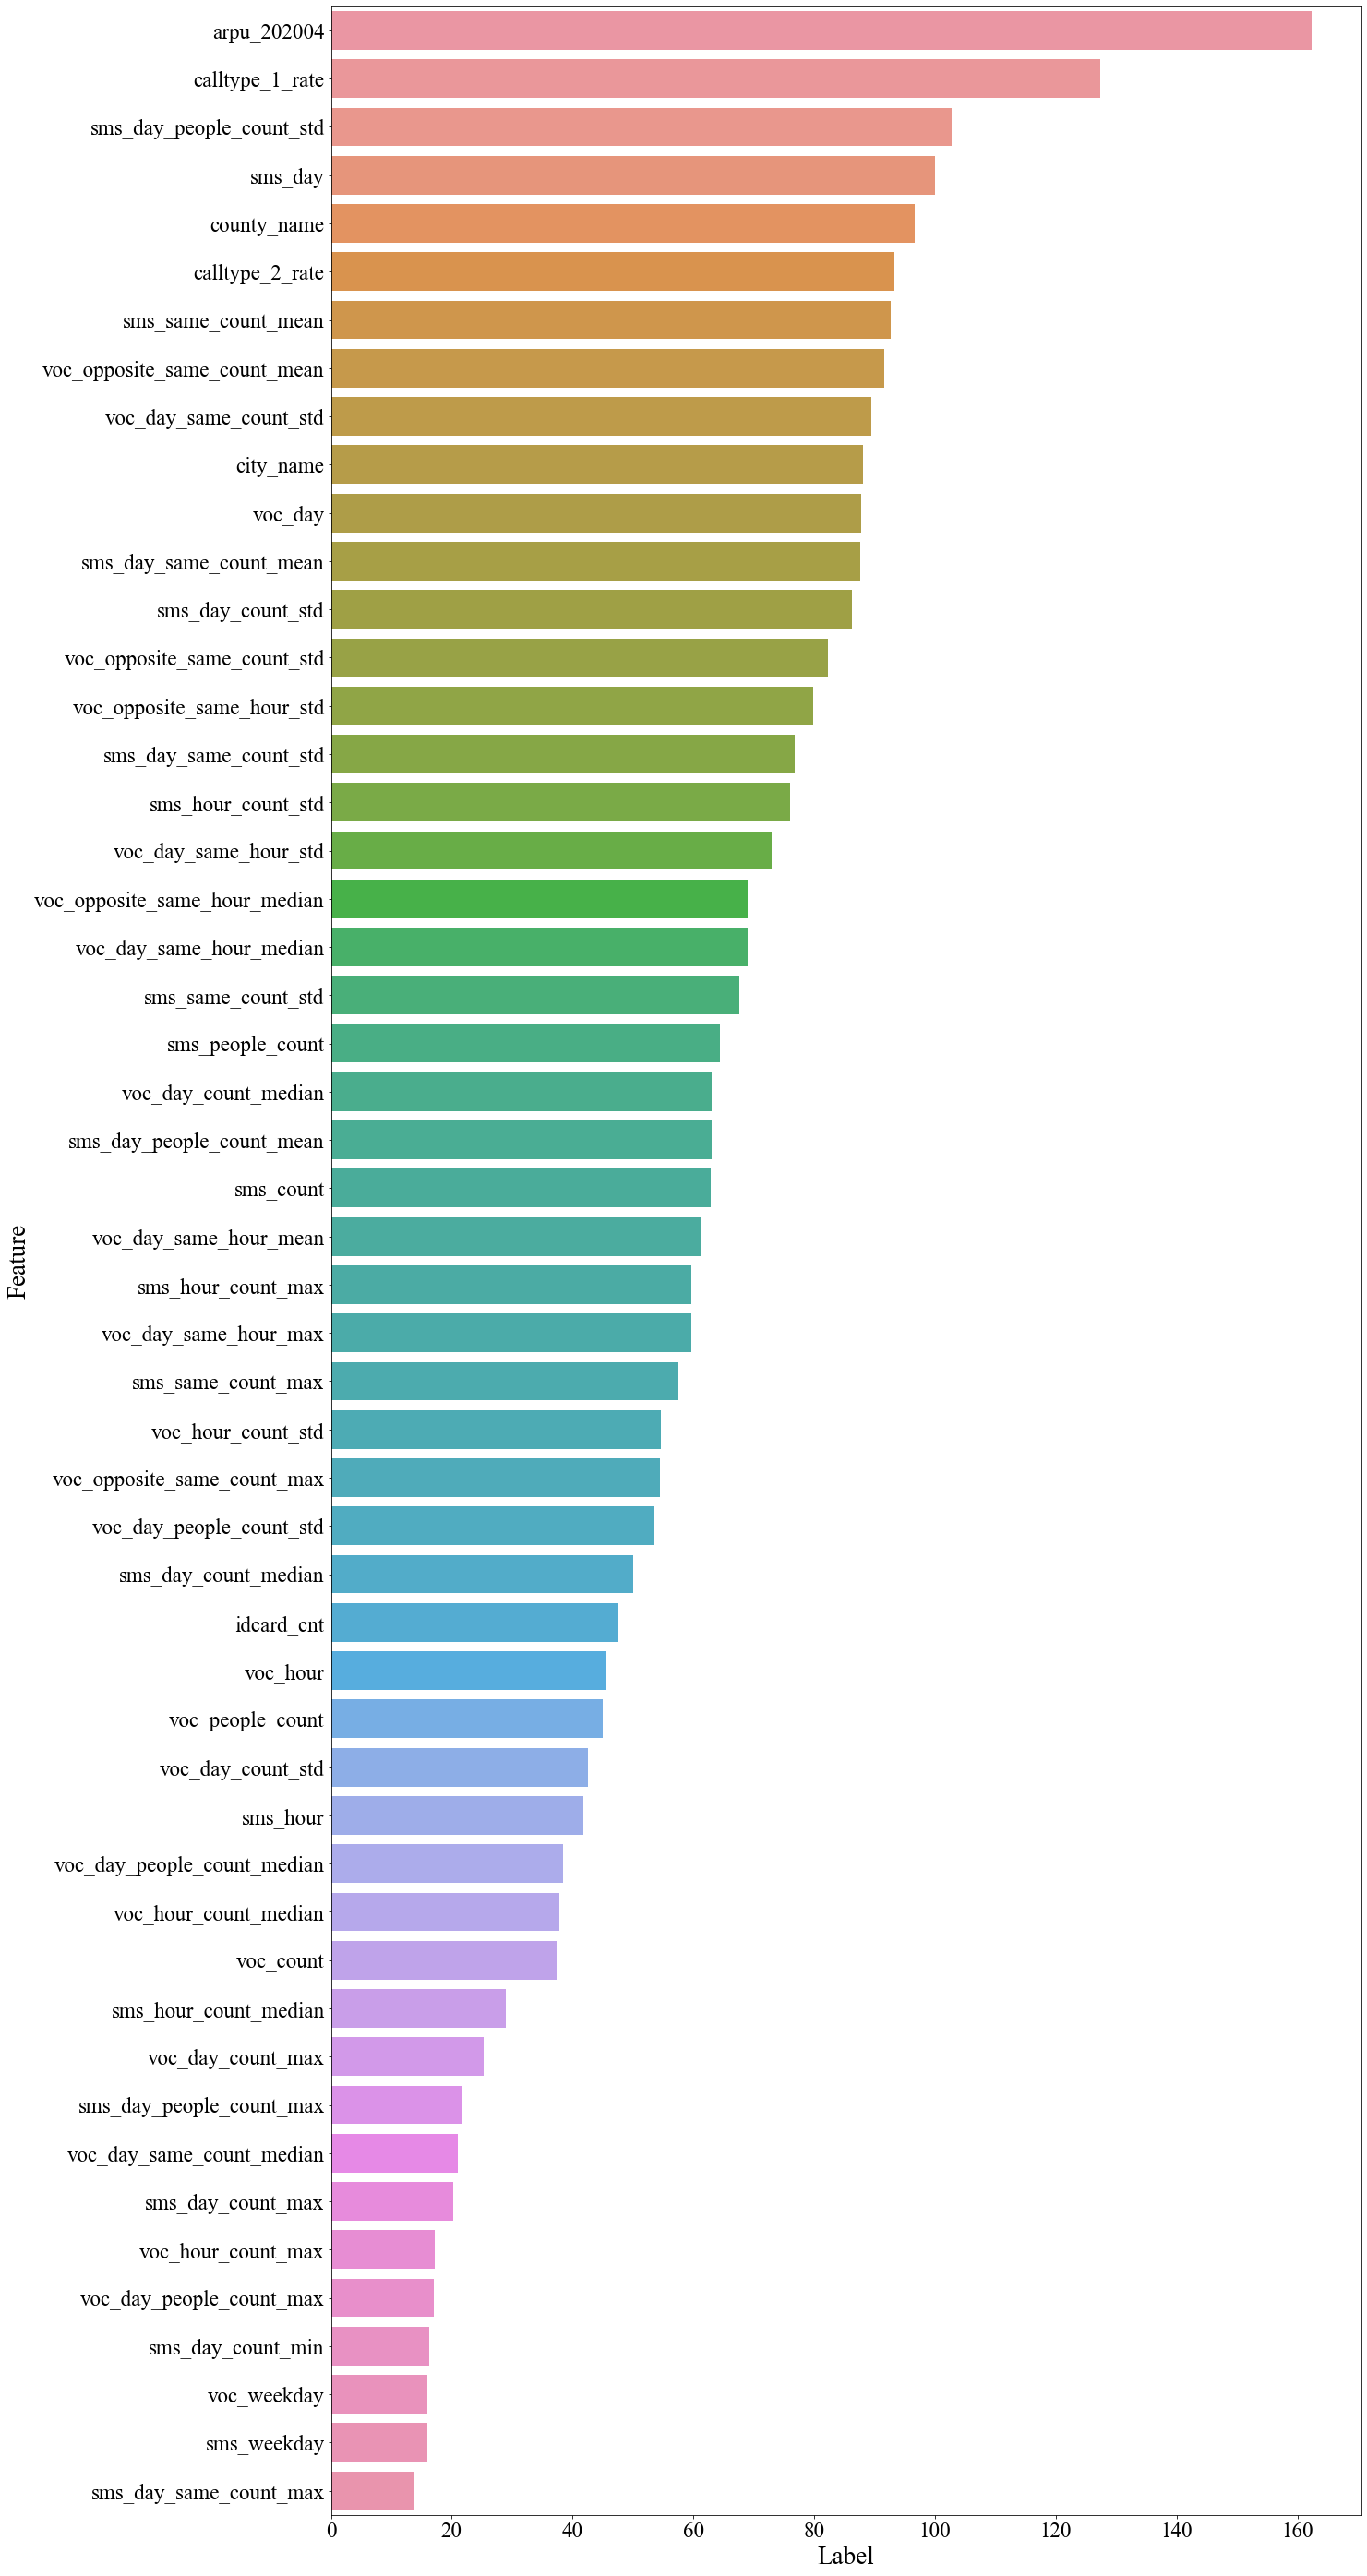

In [771]:
plt.figure(figsize=(20,50))
sns.barplot(y=imp.column,x=imp.importance,orient='h')
plt.yticks(fontproperties = 'Times New Roman', size = 23)
plt.xticks(fontproperties = 'Times New Roman', size = 23)
#plt.tick_params(labelsize=18)
plt.xlabel('Label',size=27,family= 'Times New Roman')
plt.ylabel('Feature',size=27,family= 'Times New Roman')
#plt.title('Total_flow',size=25,family= 'Times New Roman')

In [772]:
df_oof = pd.concat(oof)
f1 = f1_score(df_oof[ycol], df_oof['pred'])
print('f1:', f1)

f1: 0.8808625336927224


In [773]:
precision_lgb=precision_score(df_oof[ycol], df_oof['pred'])
print('precision_LGB:',precision_lgb )
recall_lgb=recall_score(df_oof[ycol], df_oof['pred'])
print('recall_LGB:',recall_lgb)
f1_lgb = f1_score(df_oof[ycol], df_oof['pred'])
print('f1_LGB:', f1)

precision_LGB: 0.9347826086956522
recall_LGB: 0.8328236493374108
f1_LGB: 0.8808625336927224


In [687]:
sub = prediction.copy(deep=True)
sub['label'] = sub['label'].apply(lambda x: 1 if x>0 else 0)
sub.head()

,phone_no_m,label
6106,22d522340df77e2252c1a4d92b4bcb00d515e36f3ec6bf...,0
6107,5220d4b8429bdba3971a7b46a088c6b8fa6710f4060759...,1
6108,7d19dd2b50ced56f03d23bf928cf34dc570a48525571a8...,0
6109,134a4a591185c9d3788021896dcfc235e9e0a6a1e3f8a4...,0
6110,2356dcd6759d50455ddaeed03c838843558e9182d5962f...,0


In [688]:
sub.label.value_counts()

0    1511
1     534
Name: label, dtype: int64

In [689]:
sub.to_csv(r'E:\Term2\数据挖掘\pre\submissions\0621_6_baseline_{}.csv'.format(f1), index=False )#encoding='utf-8'

# XGBOOST

In [734]:
import xgboost as xgb
ycol = 'label'
feature_names = list(
    filter(lambda x: x not in [ycol, 'phone_no_m'], df_train.columns))

#------Xgboost
xgb_params = {
    'eta':0.005,
    'max_depth':20,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'silent':True,
    'nthread':8}

#五折交叉训练
#cv_pred_allxgb = 0
oof_xgb1 = np.zeros(len(df_train))
#prediction_xgb1 = np.zeros(len(df_test))

NFOLDS=5
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True,random_state=2020)
kf = kfold.split(df_train[feature_names],df_train[ycol])
cv_pred = np.zeros(df_test.shape[0])

#valid_best_l2_all=0
count = 0
imp_list=[]
for i,(train_fold,validate) in enumerate(kf):
    print("fold:",i,'training')
    X_train,X_validate,label_train,label_validate = \
        df_train.iloc[train_fold,:][feature_names],df_train.iloc[validate,:][feature_names],\
        df_train.iloc[train_fold][ycol],df_train.iloc[validate][ycol]
    dtrain = xgb.DMatrix(X_train,label_train)
    dvalid = xgb.DMatrix(X_validate,label_validate)
    watchlist = [(dtrain,'train'),(dvalid,'valid_data')]#训练过程中评估的列表元素
    bst = xgb.train(dtrain = dtrain,num_boost_round = 10000,evals = watchlist,
                    early_stopping_rounds=100,verbose_eval=300,params=xgb_params)
    cv_pred += bst.predict(xgb.DMatrix(df_test[feature_names]), ntree_limit=bst.best_ntree_limit)
    oof_xgb1[validate] = bst.predict(xgb.DMatrix(X_validate), ntree_limit=bst.best_ntree_limit)
    #prediction_xgb1 += bst.predict(xgb.DMatrix(test_data), ntree_limit=bst.best_ntree_limit) / kfold.n_splits
    importances=bst.get_score
    count += 1
cv_pred /=NFOLDS

fold: 0 training
[0]	train-auc:0.95491	valid_data-auc:0.90060
Multiple eval metrics have been passed: 'valid_data-auc' will be used for early stopping.

Will train until valid_data-auc hasn't improved in 100 rounds.
[300]	train-auc:0.99779	valid_data-auc:0.93709
Stopping. Best iteration:
[231]	train-auc:0.99576	valid_data-auc:0.93802

fold: 1 training
[0]	train-auc:0.95166	valid_data-auc:0.91580
Multiple eval metrics have been passed: 'valid_data-auc' will be used for early stopping.

Will train until valid_data-auc hasn't improved in 100 rounds.
Stopping. Best iteration:
[101]	train-auc:0.99186	valid_data-auc:0.95462

fold: 2 training
[0]	train-auc:0.94997	valid_data-auc:0.93038
Multiple eval metrics have been passed: 'valid_data-auc' will be used for early stopping.

Will train until valid_data-auc hasn't improved in 100 rounds.
Stopping. Best iteration:
[59]	train-auc:0.99127	valid_data-auc:0.95158

fold: 3 training
[0]	train-auc:0.94981	valid_data-auc:0.91068
Multiple eval metrics 

In [735]:
final_pred=[round(value) for value in cv_pred]
oof_pred=[round(value) for value in oof_xgb1]
f1=f1_score(df_train[ycol],oof_pred)
f1

0.8819599109131403

In [736]:
precision_score(df_train[ycol],oof_pred)

0.9717791411042945

In [737]:
recall_score(df_train[ycol],oof_pred)

0.8073394495412844

In [658]:
prediction=pd.DataFrame(df_test['phone_no_m'])
prediction['label']=final_pred
prediction.to_csv(r'E:\Term2\数据挖掘\pre\submissions\0621_4_{}.csv'.format(f1),index=False)

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

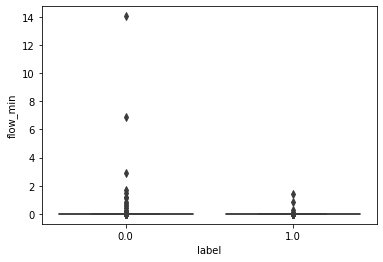

In [136]:
sns.boxplot(data = df_train,x = 'label',y='flow_min',palette="Blues_d")

In [662]:
bst.get_score()

{'voc_day_people_count_median': 812,
 'sms_day_count_median': 758,
 'voc_people_count': 760,
 'idcard_cnt': 945,
 'sms_people_count': 1156,
 'voc_day_same_count_std': 1291,
 'city_name': 1063,
 'sms_day_same_count_mean': 1560,
 'app_count': 1336,
 'voc_day_same_hour_max': 724,
 'voc_day_same_hour_median': 1228,
 'voc_day_same_hour_mean': 839,
 'voc_day_people_count_std': 775,
 'sms_count': 1122,
 'sms_hour_count_max': 822,
 'voc_hour_count_max': 306,
 'voc_day': 1165,
 'arpu_202004': 2312,
 'sms_day_people_count_max': 452,
 'voc_hour': 782,
 'flow_mean': 629,
 'voc_day_count_std': 726,
 'county_name': 1316,
 'voc_opposite_same_count_mean': 940,
 'voc_day_count_max': 317,
 'total_flow': 1042,
 'flow_min': 1561,
 'sms_same_count_std': 1178,
 'sms_hour_count_std': 1236,
 'voc_opposite_same_hour_median': 943,
 'voc_count': 567,
 'sms_hour': 982,
 'voc_opposite_same_hour_std': 840,
 'flow_max': 849,
 'voc_hour_count_median': 335,
 'voc_opposite_same_count_max': 640,
 'sms_day_count_max': 62

In [88]:
plt_data=df_train.dropna(subset=['flow_min'])

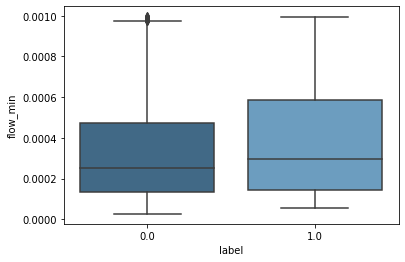

In [94]:
sns.boxplot(data= plt_data.loc[plt_data.flow_min<0.001,],x = 'label',y='flow_min',palette="Blues_d")

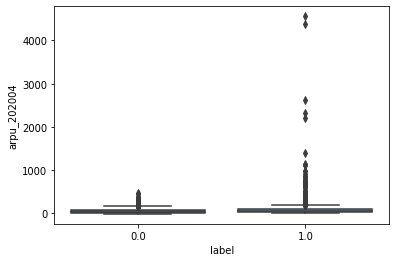

In [95]:
sns.boxplot(data = df_train,x = 'label',y='arpu_202004',palette="Blues_d")

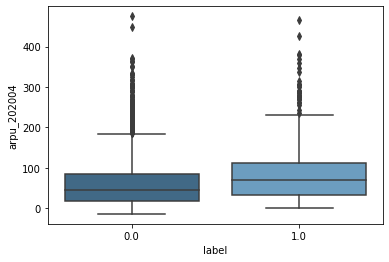

In [96]:
sns.boxplot(data= plt_data.loc[plt_data.arpu_202004<500,],x = 'label',y='arpu_202004',palette="Blues_d")

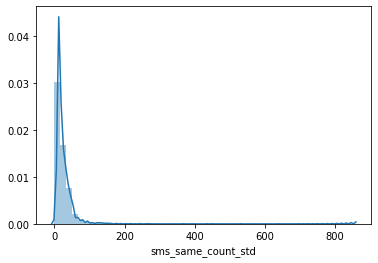

In [101]:
plt_data=df_train.dropna(subset=['sms_same_count_std'])
sns.distplot(plt_data.sms_same_count_std)

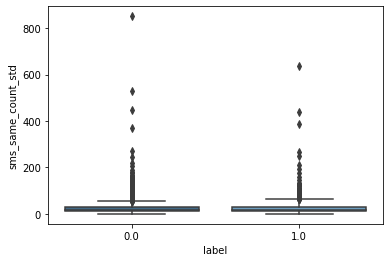

In [102]:
sns.boxplot(data= plt_data,x = 'label',y='sms_same_count_std',palette="Blues_d")

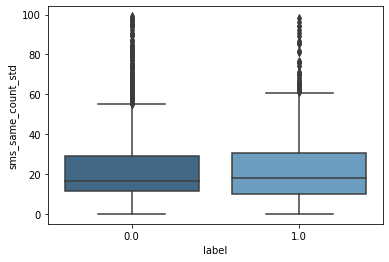

In [104]:
sns.boxplot(data=plt_data.loc[plt_data.sms_same_count_std<100,],x='label',y='sms_same_count_std',palette='Blues_d')

In [ ]:
sns.distplot(df_train.voc_day_people_count_min)